# **Life cycle of machine learning Project**

* Undrstading the problem statment 
* Data collection
* Data checks to perform 
* Explotary data analysis 
* Data Pre-Processing 
* Model Trainer
* Choose te Best Model 


# **Problem Statment**
this project understands ho the student's performance (test score) is affcted by other variables <br> sach as gendermEthnicity,paranetal level of education, lunch and Test preparation course 

**Import data and packages**

In [99]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline


**Read the Data**

In [7]:
df = pd.read_csv('data/stud.csv')
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
157,male,group B,some college,free/reduced,none,60,60,60
709,female,group D,associate's degree,free/reduced,completed,42,61,58
398,male,group B,some high school,standard,none,74,63,57
635,male,group A,high school,standard,none,71,74,64
576,male,group A,some college,standard,completed,61,51,52


In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


we noticing that:<br>
* the mean of the numerical values are betwwn 66 to 68.
* the standard deviation std ais pretty mach the same between 14.5 - 15.9 
* the min in math score in 0

In [10]:
df.shape
# 1000 rows by 8 coloumns 

(1000, 8)

**1. Data columns  information**
* gender :  sex of student(male or female)
* race/ethincity : Group(A/B/C)
* Potancial degree: bach degree / maste / high school/association
* lunch :  having lunch before test( standard / reduced )
* math score 
* reading score 
* writhing score  

**2. Data check**
* check missing values 
* check duplicates 
* check data type 
* check the unique nmber of each value 
* check various categories present in diffrent categorical columns  

 **2.1 check missing values**

In [16]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

observation : <br>
the is no missing values 

**2.2 check duplicates**

In [18]:
df.duplicated().sum()

0

observation : <br>
the is no duplucation

In [20]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**2.3 check the unique values of each column**

In [23]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [31]:
df['gender'].unique(),df['race_ethnicity'].unique(),df['parental_level_of_education'].unique(),df['lunch'].unique(),df['test_preparation_course'].unique()

(array(['female', 'male'], dtype=object),
 array(['group B', 'group C', 'group A', 'group D', 'group E'],
       dtype=object),
 array(["bachelor's degree", 'some college', "master's degree",
        "associate's degree", 'high school', 'some high school'],
       dtype=object),
 array(['standard', 'free/reduced'], dtype=object),
 array(['none', 'completed'], dtype=object))

# **3. EDA**

In [32]:
df.sample(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
431,female,group C,high school,standard,none,61,72,70
461,male,group B,some college,free/reduced,none,54,54,45
95,male,group C,associate's degree,free/reduced,completed,78,81,82


In [34]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [46]:
categorical_feature =[feature for feature in df.columns if df[feature].dtype == "O"]
numerecial_feature = [feature for feature in df.columns if df[feature].dtype!= "O"]

In [53]:
print(f"number of categorical feature :{len(categorical_feature)}\ncontains the follwing:{categorical_feature}")
print(f"number of numerical feature :{len(numerecial_feature)}\ncontains the follwing:{numerecial_feature}")

number of categorical feature :5
contains the follwing:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
number of numerical feature :3
contains the follwing:['math_score', 'reading_score', 'writing_score']


In [54]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Adding columns for Total score and Avrage**

In [56]:
df['Total_score']= df['math_score']+  df['reading_score']+df['writing_score']
df['Avrage'] = df['Total_score']/3 
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [59]:
df['Avrage'] = df['Avrage'].round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [93]:
full_math = df[df['math_score'] == 100]['Avrage'].count()
full_reading = df[df['reading_score'] == 100]['Avrage'].count()
full_writing = df[df['writing_score'] == 100]['Avrage'].count()


In [91]:
print("numbe of student who had the full mark in math: {}".format(full_math))
print("numbe of student who had the full mark in reading: {}".format(full_reading))
print("numbe of student who had the full mark in writing:{}".format(full_writing))

numbe of student who had the full mark in math: 7
numbe of student who had the full mark in reading: 17
numbe of student who had the full mark in writing:14


In [97]:
less20_math = df[df['math_score'] <= 20]['Avrage'].count()
less20_reading = df[df['reading_score'] <= 20]['Avrage'].count()
less20_writing = df[df['writing_score'] <= 20]['Avrage'].count()

In [98]:
print("numbe of student who had the less or equal 20 mark in math: {}".format(less20_math))
print("numbe of student who had the less or equal 20 mark in reading: {}".format(less20_reading))
print("numbe of student who had the less or equal 20 mark in writing:{}".format(less20_writing))

numbe of student who had the less or equal 20 mark in math: 4
numbe of student who had the less or equal 20 mark in reading: 1
numbe of student who had the less or equal 20 mark in writing:3


we notice that :<br>
* the student who perfomed the worst are in math section
* best performance are in reading section 

# **EDA With visualization**

* Histogram
* kernal distribution (KDE) 

In [114]:
df.sample(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
611,female,group C,some college,standard,none,58,59,66,183,61.0
127,male,group D,some college,standard,completed,65,77,74,216,72.0


Text(0.5, 1.0, 'distrubtion of Avrage score for the twoo genders')

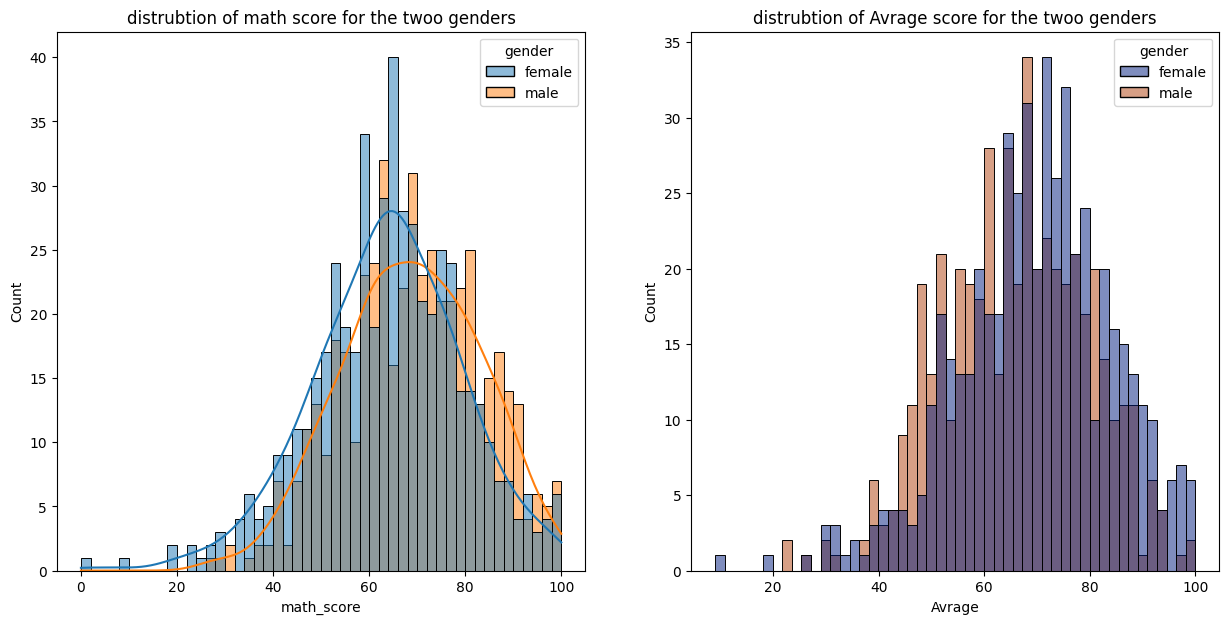

In [129]:
fig,axe = plt.subplots(1,2,figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df,x='math_score',bins=50,kde=True,hue='gender')
plt.title('distrubtion of math score for the twoo genders' )
plt.subplot(122)
sns.histplot(data=df,x='Avrage',bins=50,hue='gender',palette='dark')
plt.title('distrubtion of Avrage score for the twoo genders')


* Female student tend to perform bettre the the student in general
* other wise in math section men are performing bettre

In [131]:
df.sample()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avrage
951,female,group D,some college,standard,completed,75,77,83,235,78.33


Text(0.5, 1.0, 'Distrbution of female Avrage marks for the test preparation ')

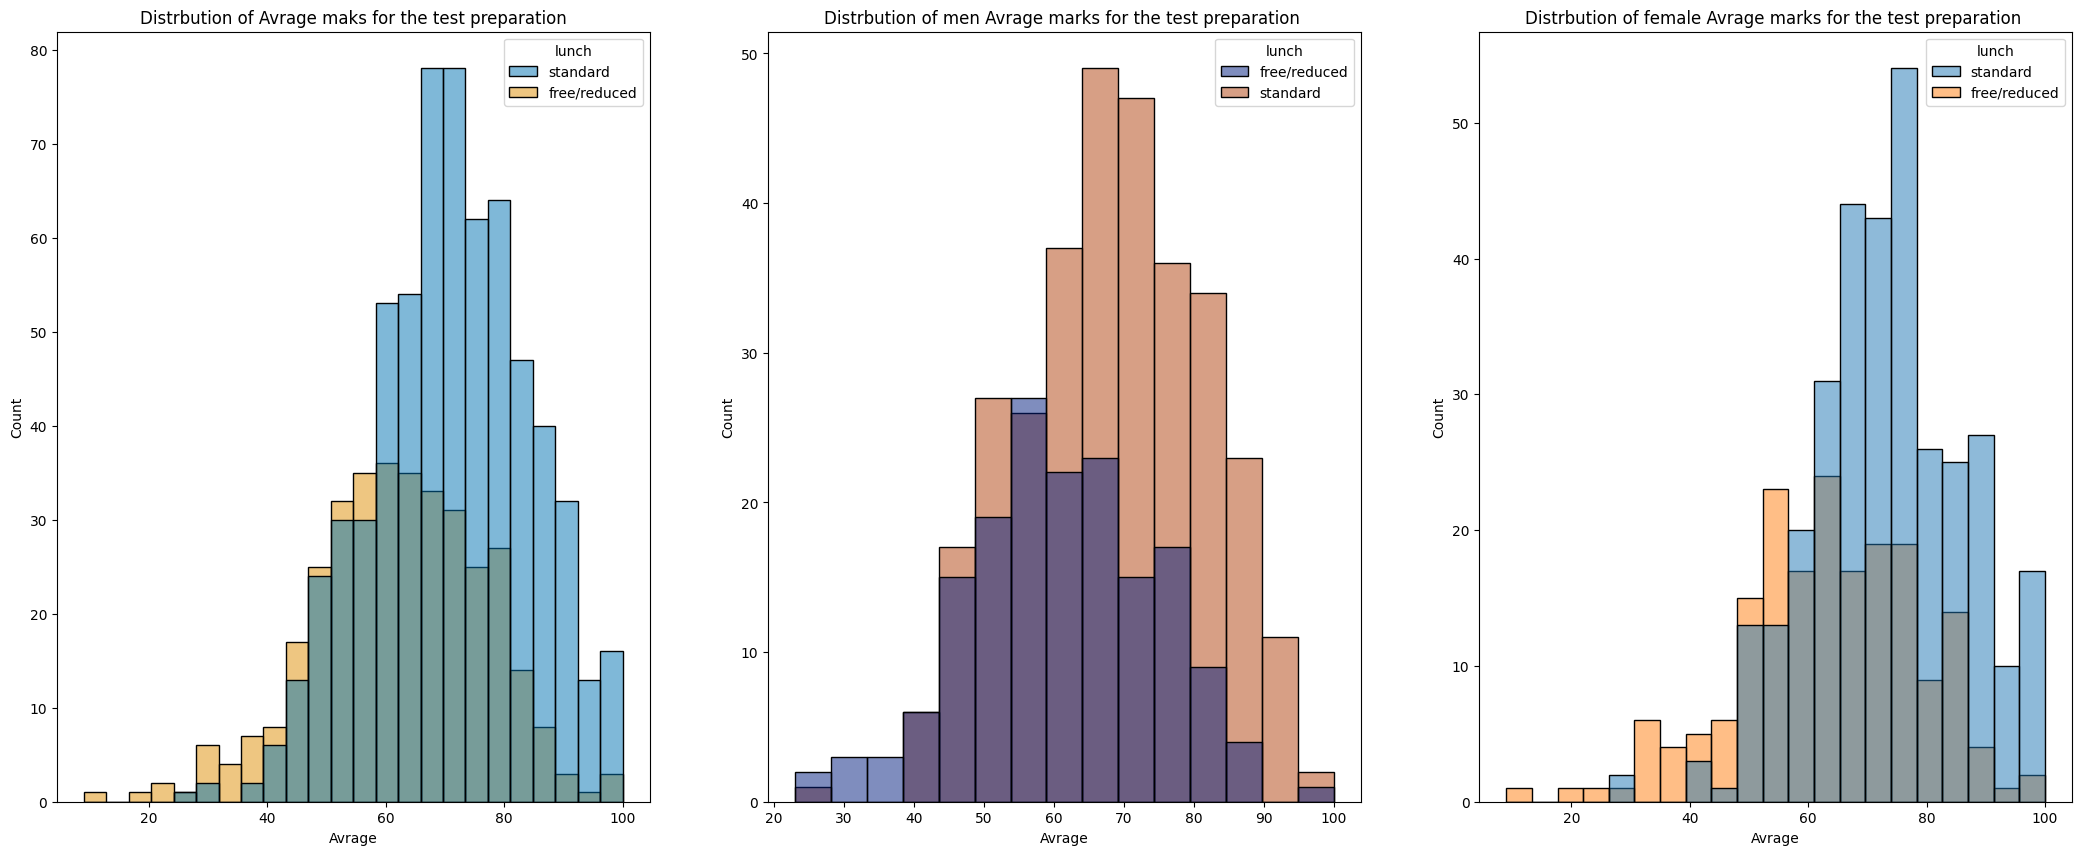

In [167]:
fig,axe = plt.subplots(1,3,figsize =(26,10))
plt.subplot(131)
sns.histplot(data=df,x ='Avrage',hue='lunch',palette='colorblind')
plt.title('Distrbution of Avrage maks for the test preparation')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender'] == 'male'],x ='Avrage',hue='lunch',palette='dark')
plt.title('Distrbution of men Avrage marks for the test preparation ')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender'] == 'female'],x ='Avrage',hue='lunch')
plt.title('Distrbution of female Avrage marks for the test preparation ')
